#Heat Maps
A **heat map** is a 2-d version of the histogram that can be used as an alternative to a scatterplot. Like a scatterplot, the values of the two numeric variables to be plotted are placed on the plot axes. Similar to a histogram, the plotting area is divided into a grid and the number of points in each grid rectangle is added up. Since there won't be room for bar heights, counts are indicated instead by grid cell color. A heat map can be implemented with Matplotlib's hist2d() function.

**Heat  are useful in the following cases**:

      1. To represent a plot for discrete vs. another discrete variable
      2. As an alternative to transparency when the data points are enormous

In [ ]:
# importing necessary liberaries
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import pandas as pd
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Example 1. Default heat plot using Matplotlib.pyplot.hist2d() function


In [ ]:
fuel_data = pd.read_csv('/content/drive/MyDrive/Data Folder /fuel-econ.csv')
fuel_data.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


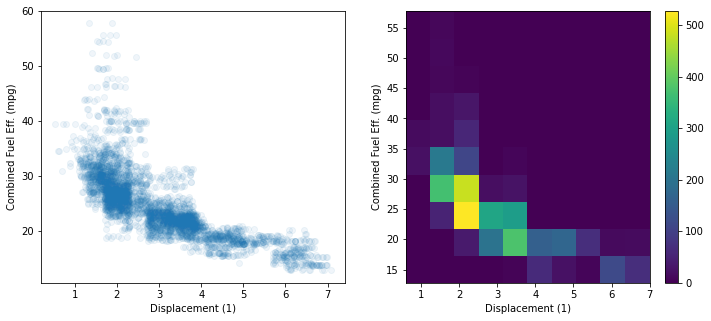

In [ ]:
plt.figure(figsize=[12,5]);

# plot on Left : scatter with jitter and transparency['alpha']
plt.subplot(1,2,1);
sb.regplot(data =fuel_data ,x='displ' ,y='comb' ,x_jitter=0.3 , scatter_kws={'alpha':1/15} ,fit_reg=False);
plt.xlabel('Displacement (1)');
plt.ylabel('Combined Fuel Eff. (mpg)');

# plot on Right 
plt.subplot(1,2,2);
plt.hist2d(data =fuel_data ,x='displ' ,y='comb');
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# Example 2. Heat plot - Set a minimum bound on counts and a reverse color map


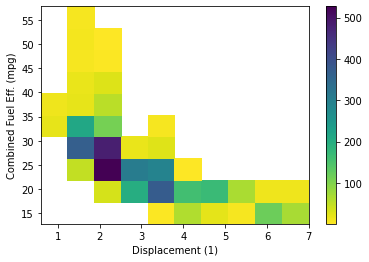

In [ ]:
# Use cmin to set a minimum bound of counts 
# Use cmap to reverse the color map.
plt.hist2d(data=fuel_data , x = 'displ', y = 'comb',cmin=0.5 ,cmap='viridis_r')
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# Example 3. Heat plot - Specify bin edges


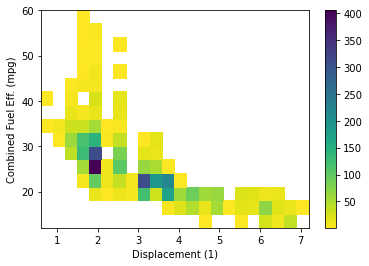

In [ ]:
# Specify bin edges
bin_x=np.arange(0.6 ,7+0.3 ,0.3)
bin_y = np.arange(12, 58+3, 3)

plt.hist2d(data = fuel_data, x = 'displ', y = 'comb', cmin=0.5,cmap='viridis_r' ,bins=[bin_x ,bin_y]);
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# Example 4. Add text annotation on each cell using pyplot.text() function


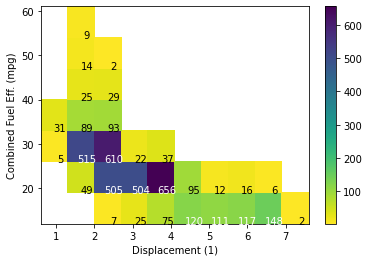

In [ ]:
# Specify bin edges 
bins_x = np.arange(0.6, 7+0.7, 0.7)
bins_y = np.arange(12, 58+7, 7)
# Use cmin to set a minimum bound of counts 
# Use cmap to reverse the color map. 
h2d = plt.hist2d(data = fuel_data, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])

plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# Select the bi-dimensional histogram, a 2D array of samples x and y. 
# Values in x are histogrammed along the first dimension and 
# values in y are histogrammed along the second dimension.
counts = h2d[0]

# Add text annotation on each cell
# Loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 100: # increase visibility on darker cells
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'black')

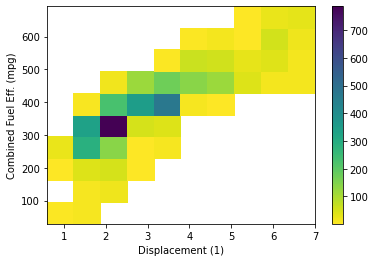

In [ ]:
#fuel_econ['co2'] = fuel_econ['co2'].astype(float)
plt.hist2d(data =fuel_data ,x='displ' ,y='co2' ,cmin=0.5, cmap='viridis_r');
plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# colors for cmap
[link text](https://matplotlib.org/stable/tutorials/colors/colormaps.html)